In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_train = pd.read_csv(r'train.csv')
df_test = pd.read_csv(r'test.csv')

In [4]:
df_train.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [5]:
df_train.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars)
count,94268.000000,94268.000000,94268.000000,94268.000000,94268.000000,94268.000000,94268.0,94268.000000
mean,11.949454,10.872365,0.733875,10.838893,187.707907,10.355367,0.0,1002.864099
std,9.601178,10.752540,0.196034,6.950710,107.652333,4.172897,0.0,118.290080
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.527778,2.244444,0.600000,5.796000,114.000000,8.372000,0.0,1011.800000
50%,12.077778,12.077778,0.780000,10.014200,180.000000,10.046400,0.0,1016.330000
75%,18.866667,18.866667,0.890000,14.151900,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
df_train.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 143
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Cloud Cover                   0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [7]:
df_train.shape

(94268, 12)

In [8]:
# Dropping the null values
df_train = df_train.dropna(axis=0, subset=['Precip Type'])
df_train.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Cloud Cover                 0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [9]:
df_train["Cloud Cover"].value_counts()

0    94125
Name: Cloud Cover, dtype: int64

In [10]:
# Since all the values in 'Cloud Cover' are 0, we will drop it
df_train.drop(columns = "Cloud Cover", inplace = True)
df_train.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94125 entries, 0 to 94267
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            94125 non-null  object 
 1   Summary                   94125 non-null  object 
 2   Precip Type               94125 non-null  object 
 3   Temperature (C)           94125 non-null  float64
 4   Apparent Temperature (C)  94125 non-null  float64
 5   Humidity                  94125 non-null  float64
 6   Wind Speed (km/h)         94125 non-null  float64
 7   Wind Bearing (degrees)    94125 non-null  int64  
 8   Visibility (km)           94125 non-null  float64
 9   Pressure (millibars)      94125 non-null  float64
 10  Daily Summary             94125 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.6+ MB


## Exploratory Data Analysis

In [12]:
df_train_dates = df_train.iloc[12::24,:]

In [13]:
df_train_dates

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
12,2006-04-01 12:00:00.000 +0200,Partly Cloudy,rain,17.800000,17.800000,0.55,21.9443,281,11.2700,1017.59,Partly cloudy throughout the day.
36,2006-04-10 12:00:00.000 +0200,Mostly Cloudy,rain,19.005556,19.005556,0.46,23.8924,169,9.9820,1013.04,Mostly cloudy throughout the day.
60,2006-04-11 12:00:00.000 +0200,Mostly Cloudy,rain,17.516667,17.516667,0.67,0.6762,153,10.8997,1005.64,Foggy in the evening.
84,2006-04-12 12:00:00.000 +0200,Mostly Cloudy,rain,8.900000,5.161111,0.77,29.8333,348,11.2700,1004.47,Foggy overnight and breezy in the morning.
108,2006-04-13 12:00:00.000 +0200,Overcast,rain,7.961111,6.072222,0.70,10.7548,321,10.0464,1010.22,Overcast throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
94163,2016-05-05 15:00:00.000 +0200,Mostly Cloudy,rain,21.183333,21.183333,0.36,25.6634,20,9.9820,1017.59,Partly cloudy throughout the day.
94187,2016-05-06 15:00:00.000 +0200,Partly Cloudy,rain,22.688889,22.688889,0.38,14.2646,9,10.2557,1016.17,Partly cloudy throughout the day.
94211,2016-05-07 15:00:00.000 +0200,Partly Cloudy,rain,22.127778,22.127778,0.33,19.4649,352,15.8263,1014.30,Partly cloudy throughout the day.
94235,2016-05-08 15:00:00.000 +0200,Mostly Cloudy,rain,19.933333,19.933333,0.37,11.7852,343,9.9820,1016.53,Partly cloudy throughout the day.


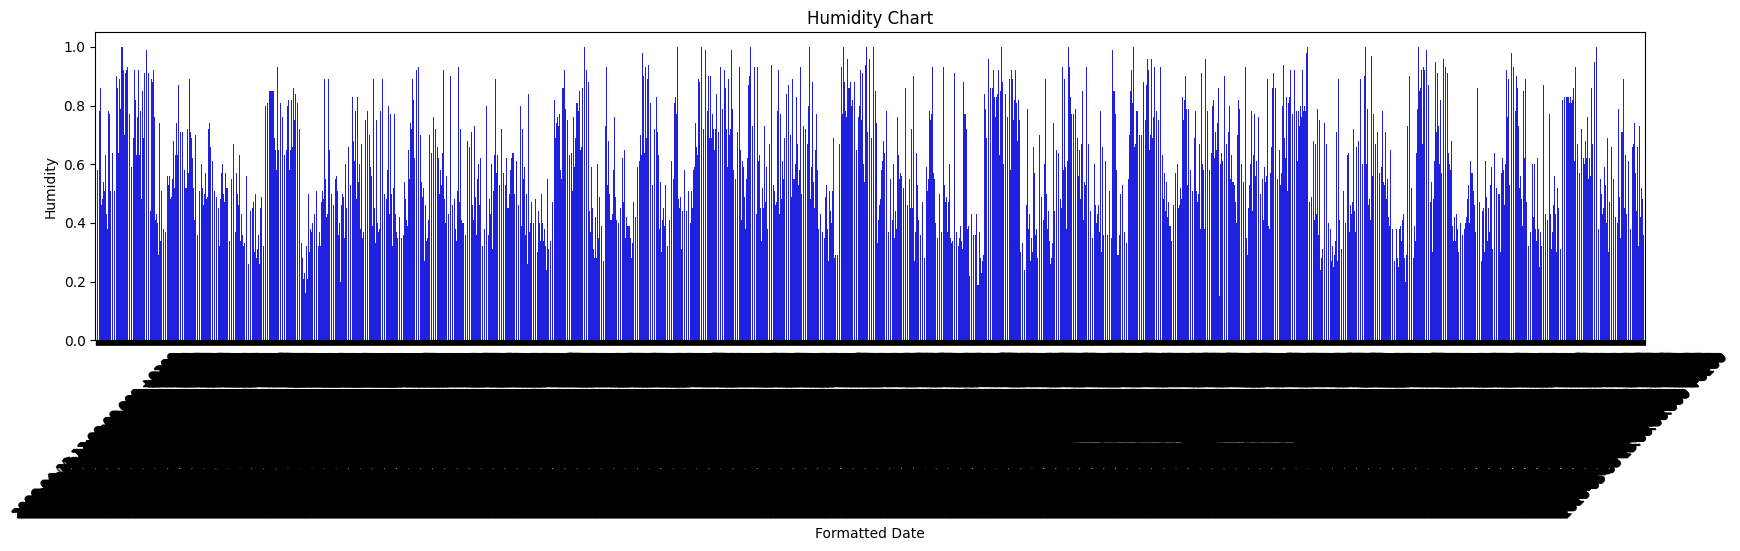

In [14]:
plt.figure(figsize=(20,4))
sns.barplot(x='Formatted Date',y='Humidity', data = df_train_dates , color = 'b',label = 'Humidity')
plt.xticks(rotation=45)
plt.title('Humidity Chart')
plt.show()

In [15]:
df_train["Summary"].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry'], dtype=object)

In [16]:
df_train["Summary"].value_counts()

Partly Cloudy                          30964
Mostly Cloudy                          27192
Overcast                               16358
Clear                                  10630
Foggy                                   7083
Breezy and Overcast                      526
Breezy and Mostly Cloudy                 515
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Light Rain                                17
Dry and Mostly Cloudy                     14
Windy                                      8
Humid and Overcast                         7
Drizzle                                    5
Windy and 

In [17]:
df_train_summary = df_train['Summary'].value_counts().to_frame()
df_train_summary
df_train_summary = df_train_summary.reset_index()
df_train_summary.columns = ['Summary', 'Counts']
df_train_summary

,Summary,Counts
0,Partly Cloudy,30964
1,Mostly Cloudy,27192
2,Overcast,16358
3,Clear,10630
4,Foggy,7083
5,Breezy and Overcast,526
6,Breezy and Mostly Cloudy,515
7,Breezy and Partly Cloudy,386
8,Dry and Partly Cloudy,86
9,Windy and Partly Cloudy,67


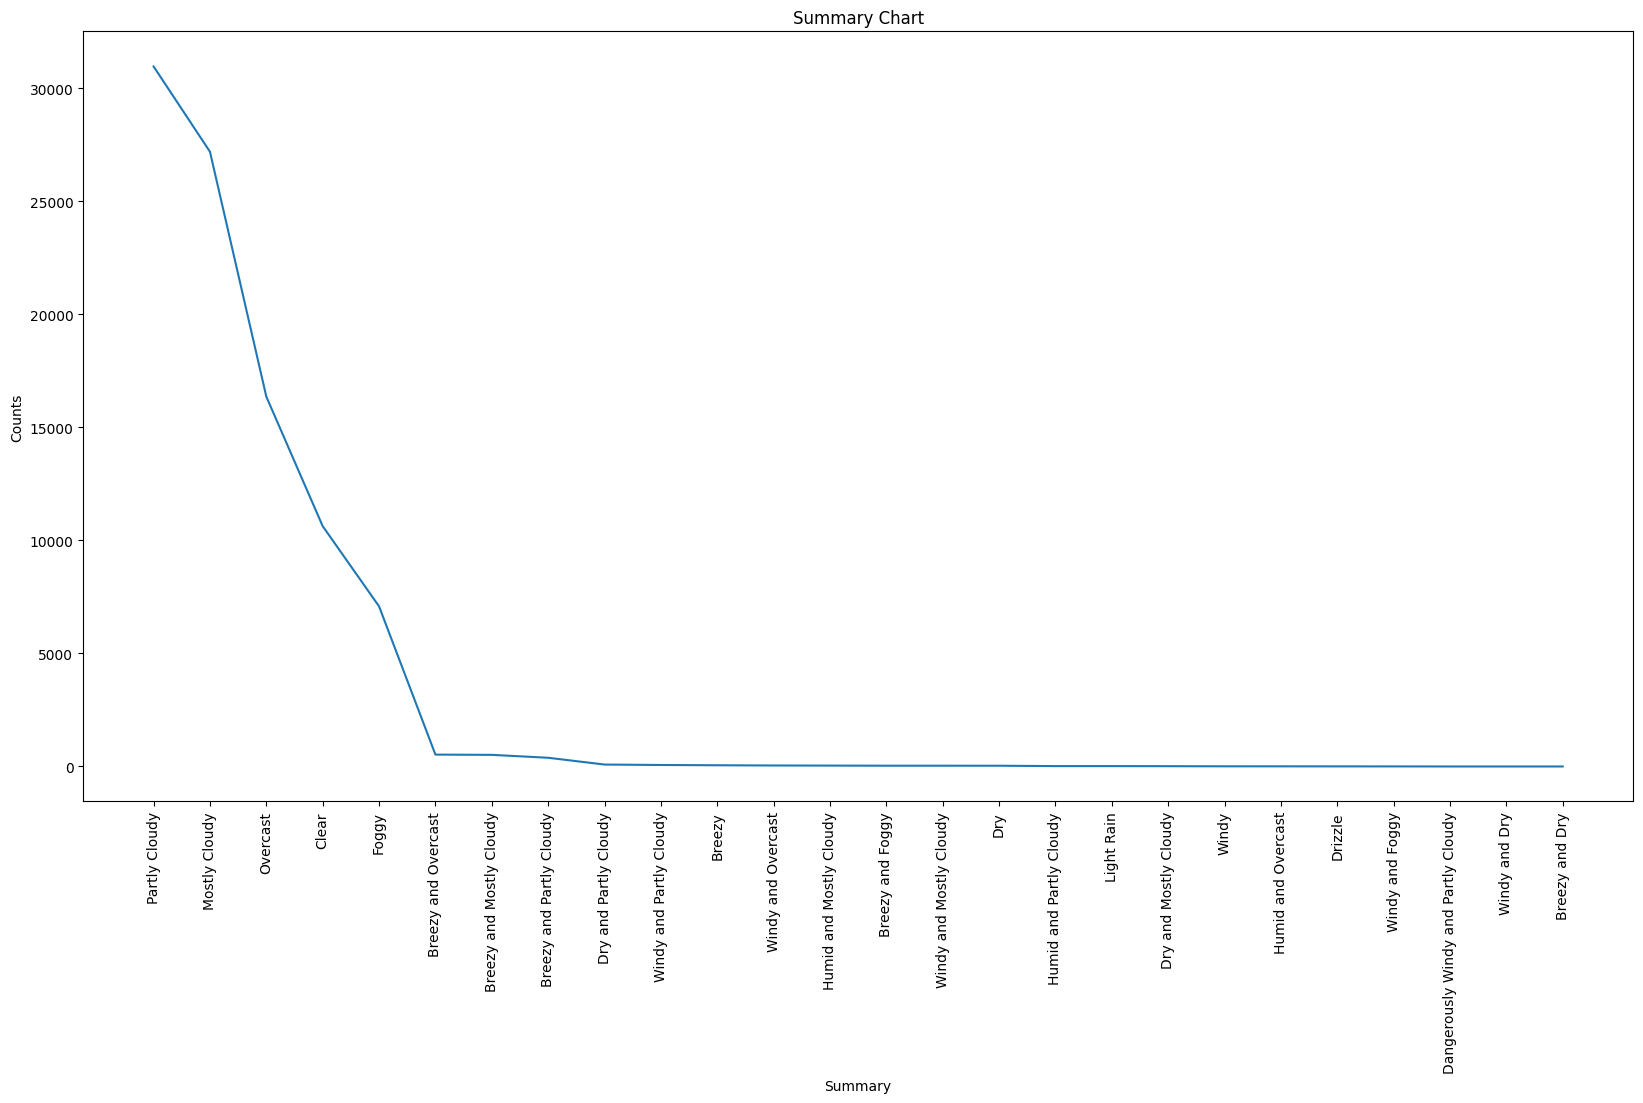

In [18]:
plt.figure(figsize=(20,10))
sns.lineplot(data = df_train_summary,x='Summary',y='Counts')
plt.xticks(rotation=90)
plt.title('Summary Chart')
plt.show()

In [19]:
df_train["Year"] = df_train["Formatted Date"].str[:4].astype('int')
df_train.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Year
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,2006
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,2006
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,2006
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,2006
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,2006


In [20]:
# Grouping data by the years
grouped = df_train.groupby(df_train.Year)
df_train_2006 = grouped.get_group(2006)
df_train_2007 = grouped.get_group(2007)
df_train_2008 = grouped.get_group(2008)
df_train_2009 = grouped.get_group(2009)
df_train_2010 = grouped.get_group(2010)
df_train_2011 = grouped.get_group(2011)
df_train_2012 = grouped.get_group(2012)
df_train_2013 = grouped.get_group(2013)
df_train_2014 = grouped.get_group(2014)
df_train_2015 = grouped.get_group(2015)
df_train_2016 = grouped.get_group(2016)

In [21]:
correlation = df_train.corr()
correlation

C:\Users\HP\AppData\Local\Temp\ipykernel_4432\2784009186.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_train.corr()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Year
Temperature (C),1.000000,0.992616,-0.630585,0.009549,0.030480,0.392024,-0.005095,0.020803
Apparent Temperature (C),0.992616,1.000000,-0.600865,-0.056404,0.029417,0.380663,0.000137,0.020254
Humidity,-0.630585,-0.600865,1.000000,-0.225829,0.000547,-0.369251,0.004845,0.032420
Wind Speed (km/h),0.009549,-0.056404,-0.225829,1.000000,0.104217,0.105184,-0.049036,0.002147
Wind Bearing (degrees),0.030480,0.029417,0.000547,0.104217,1.000000,0.050025,-0.011453,-0.023760
Visibility (km),0.392024,0.380663,-0.369251,0.105184,0.050025,1.000000,0.061307,0.115391
Pressure (millibars),-0.005095,0.000137,0.004845,-0.049036,-0.011453,0.061307,1.000000,0.011392
Year,0.020803,0.020254,0.032420,0.002147,-0.023760,0.115391,0.011392,1.000000


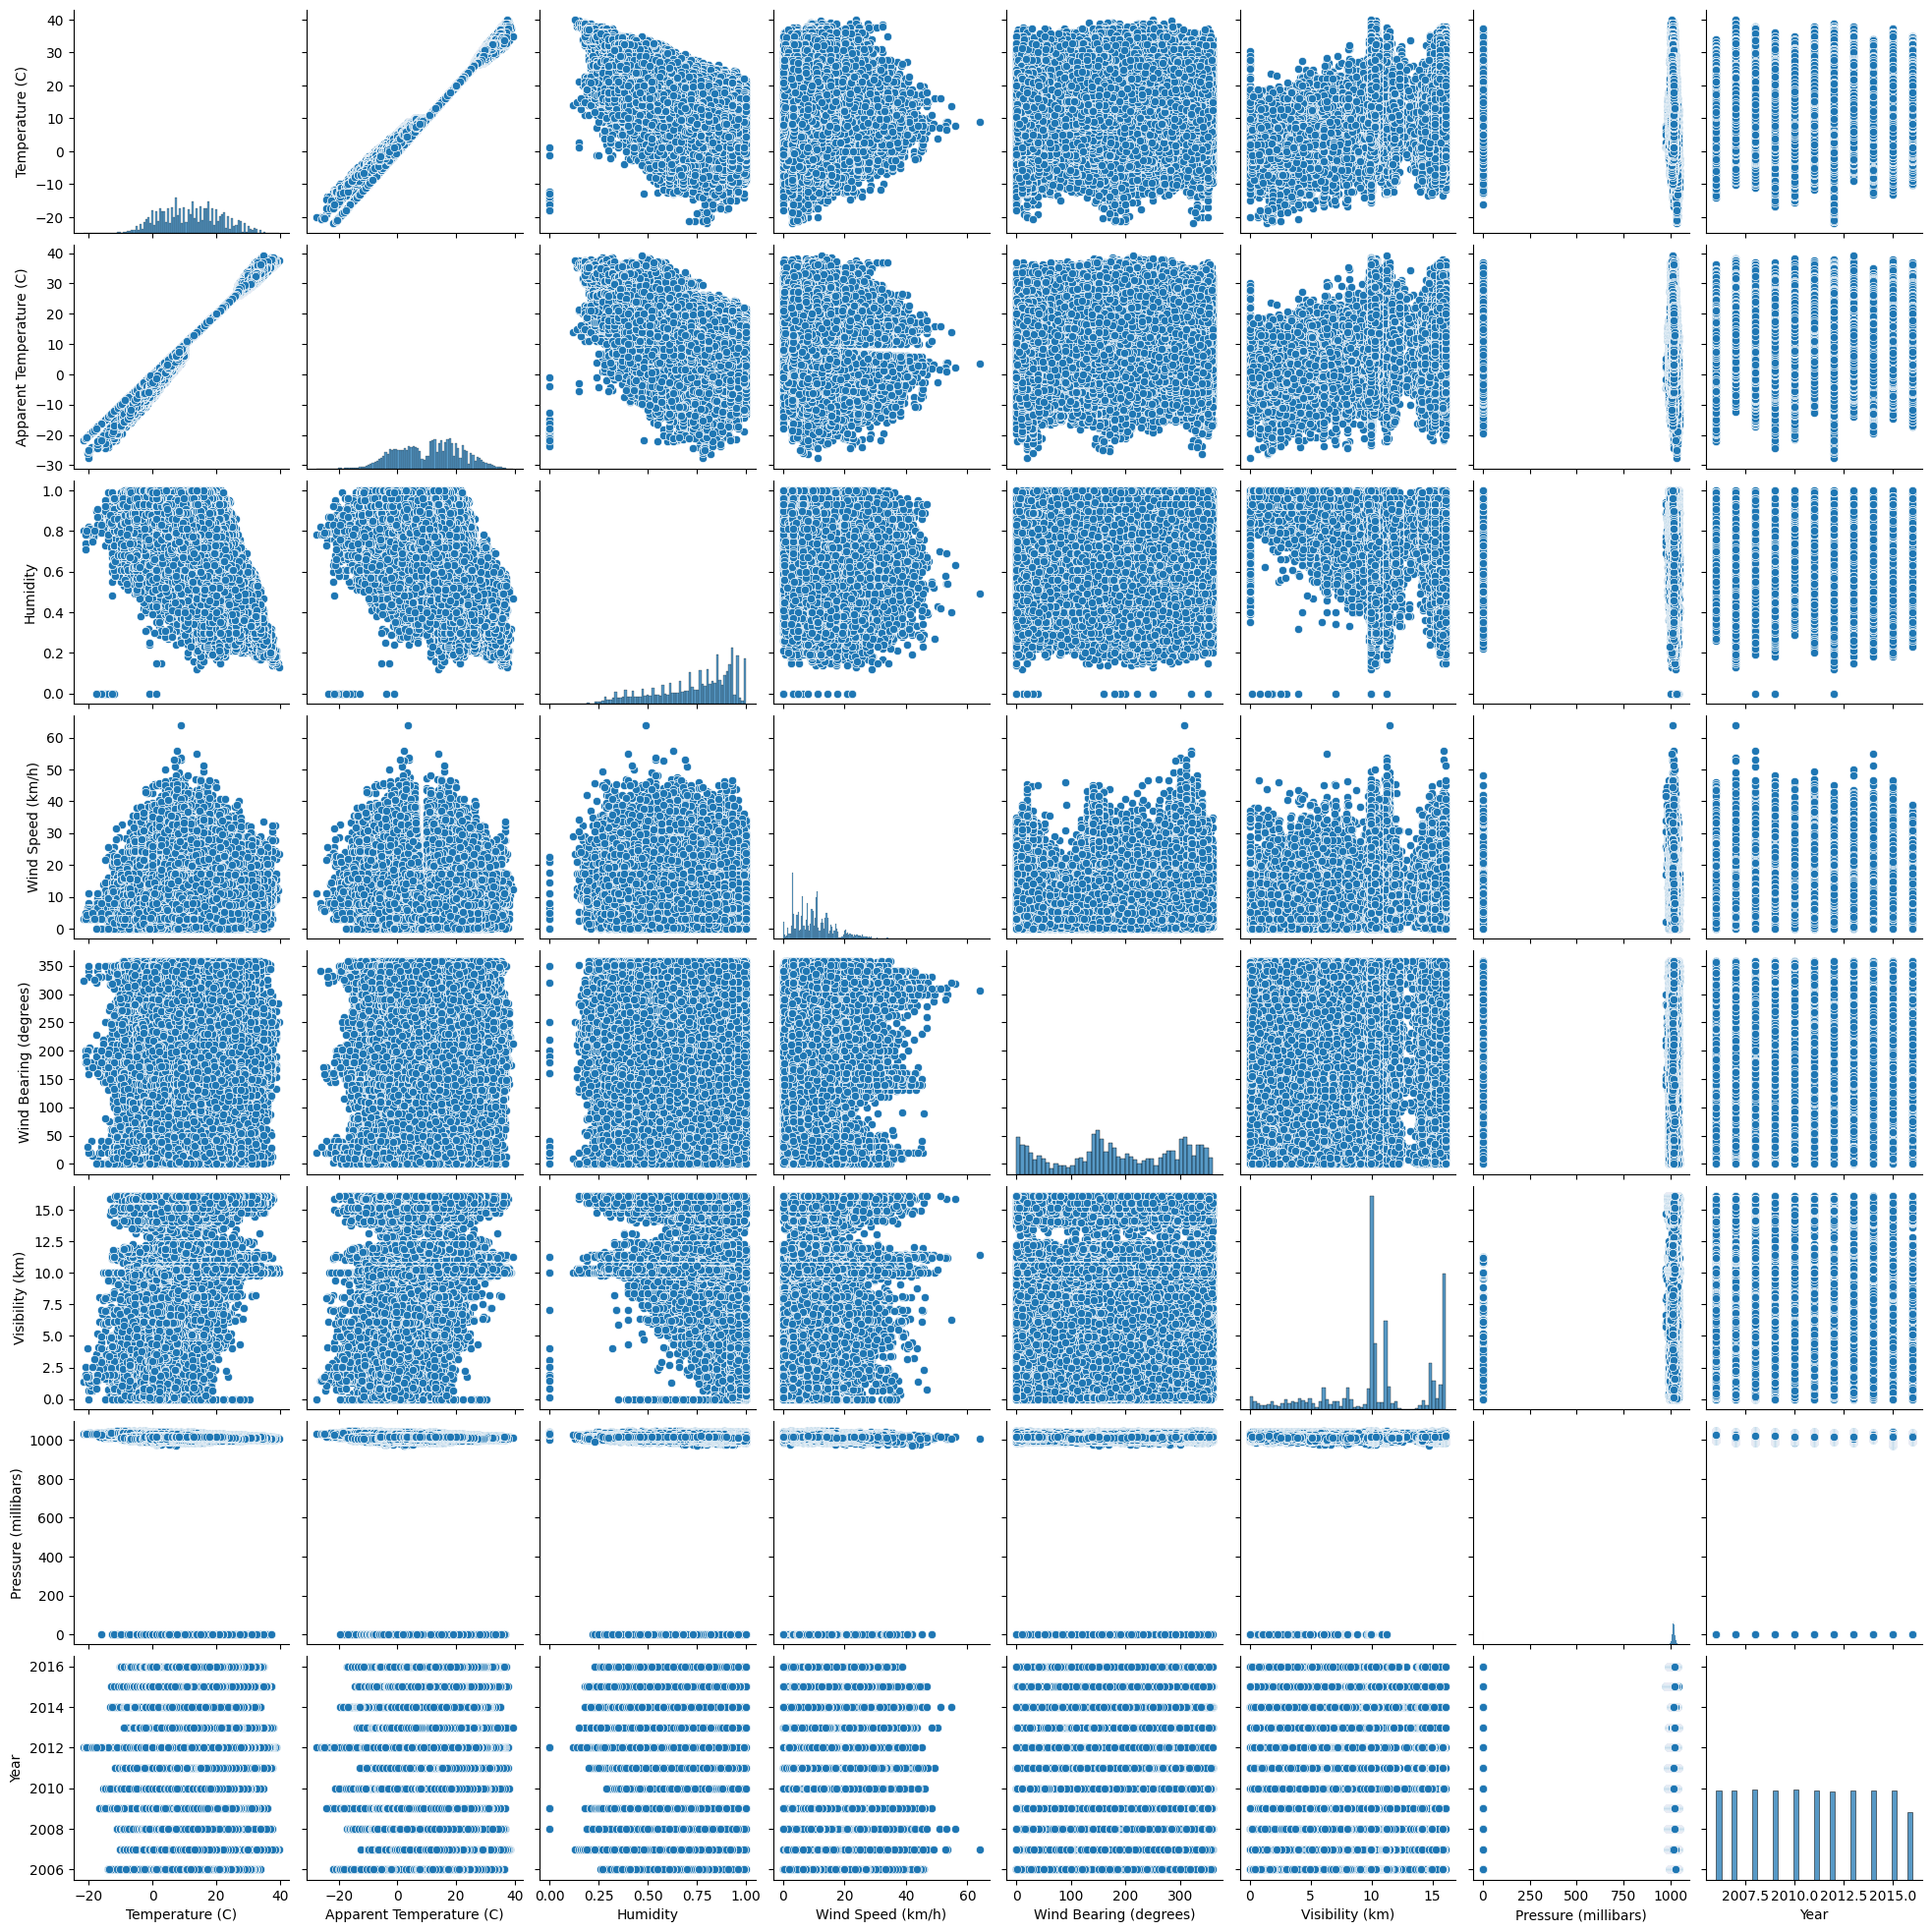

In [22]:
sns.pairplot(df_train)

<Axes: >

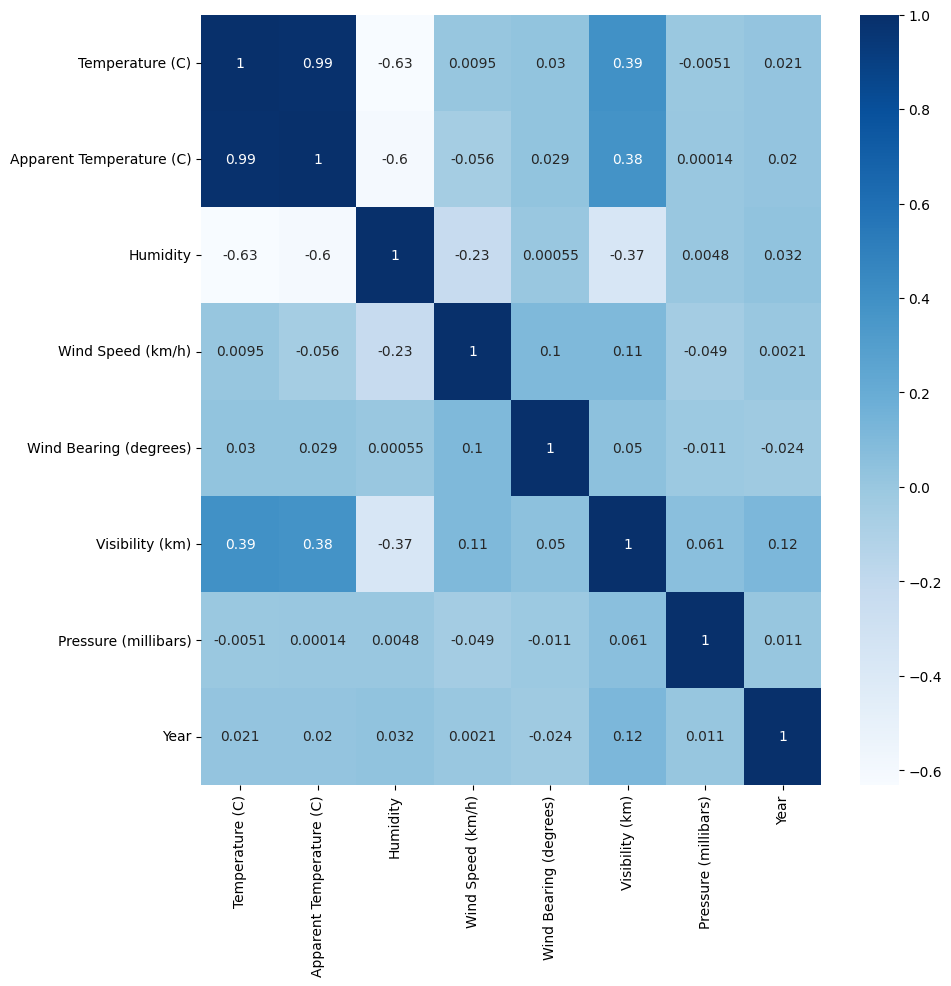

In [23]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, annot = True, cmap='Blues')

## Feature Engineering and feature selection
### We will be taking:
### "Summary" as X_features_new
### "Daily Summary as Y_target"
### We will be taking 2 models, Logistic Regression and Random Forest Classifier
### Finally, we will consider the best model for evaluation

In [24]:
df_train.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Year
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,2006
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,2006
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,2006
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,2006
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,2006


In [25]:
df_test.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary
0,2016-11-01 00:00:00.000 +0100,Mostly Cloudy,NaN,6.205556,4.527778,0.92,8.1466,297,0.0,0,1021.74,Partly cloudy starting in the afternoon.
1,2016-11-01 01:00:00.000 +0100,Mostly Cloudy,NaN,5.827778,4.177778,0.92,7.7763,296,0.0,0,1021.69,Partly cloudy starting in the afternoon.
2,2016-11-01 02:00:00.000 +0100,Partly Cloudy,NaN,5.311111,3.616667,0.93,7.6153,298,0.0,0,1021.61,Partly cloudy starting in the afternoon.
3,2016-11-01 03:00:00.000 +0100,Partly Cloudy,NaN,4.800000,3.088889,0.94,7.3738,300,0.0,0,1021.54,Partly cloudy starting in the afternoon.
4,2016-11-01 04:00:00.000 +0100,Clear,NaN,4.483333,2.883333,0.95,6.8103,303,0.0,0,1021.54,Partly cloudy starting in the afternoon.


In [26]:
#X_features_1 = df_train[["Temperature (C)", "Humidity", "Wind Speed (km/h)", "Pressure (millibars)"]]
#X_features_test_1 = df_test[["Temperature (C)", "Humidity", "Wind Speed (km/h)", "Pressure (millibars)"]]
#Y_target_1 = df_train[["Daily Summary"]]
#Y_target_test_1 = df_test[["Daily Summary"]]

In [27]:
# Ordinal encoding for taking "Summary" as feature.
import category_encoders as ce

encoder_train= ce.OrdinalEncoder(cols=['Summary'],return_df=True,
                           mapping=[{'col':'Summary',
'mapping':{'Partly Cloudy':1, 'Mostly Cloudy':2, 'Overcast':3, 'Foggy':4, 'Breezy and Mostly Cloudy':5,
           'Clear':6, 'Breezy and Partly Cloudy':7, 'Breezy and Overcast':8, 'Humid and Mostly Cloudy':9,
           'Humid and Partly Cloudy':10, 'Windy and Foggy':11, 'Windy and Overcast':12,
           'Breezy and Foggy':13, 'Windy and Partly Cloudy':14, 'Breezy':15,
           'Dry and Partly Cloudy':16, 'Windy and Mostly Cloudy':17,
           'Dangerously Windy and Partly Cloudy':18, 'Dry':19, 'Windy':20,
           'Humid and Overcast':21, 'Light Rain':22, 'Drizzle':23, 'Windy and Dry':24,
           'Dry and Mostly Cloudy':25, 'Breezy and Dry':26}}])
df_train_transformed = encoder_train.fit_transform(df_train)

encoder_test= ce.OrdinalEncoder(cols=['Summary'],return_df=True,
                           mapping=[{'col':'Summary',
'mapping':{'Partly Cloudy':1, 'Mostly Cloudy':2, 'Overcast':3, 'Foggy':4, 'Breezy and Mostly Cloudy':5,
           'Clear':6, 'Breezy and Partly Cloudy':7, 'Breezy and Overcast':8, 'Humid and Mostly Cloudy':9,
           'Humid and Partly Cloudy':10, 'Windy and Foggy':11, 'Windy and Overcast':12,
           'Breezy and Foggy':13, 'Windy and Partly Cloudy':14, 'Breezy':15,
           'Dry and Partly Cloudy':16, 'Windy and Mostly Cloudy':17,
           'Dangerously Windy and Partly Cloudy':18, 'Dry':19, 'Windy':20,
           'Humid and Overcast':21, 'Light Rain':22, 'Drizzle':23, 'Windy and Dry':24,
           'Dry and Mostly Cloudy':25, 'Breezy and Dry':26}}])
df_test_transformed = encoder_test.fit_transform(df_test)

In [28]:
df_test_transformed["Summary"] = df_test_transformed["Summary"].astype('int')

In [29]:
df_train_transformed.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Year
0,2006-04-01 00:00:00.000 +0200,1,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,2006
1,2006-04-01 01:00:00.000 +0200,1,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,2006
2,2006-04-01 02:00:00.000 +0200,2,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,2006
3,2006-04-01 03:00:00.000 +0200,1,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,2006
4,2006-04-01 04:00:00.000 +0200,2,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,2006


In [30]:
df_test_transformed.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary
0,2016-11-01 00:00:00.000 +0100,2,NaN,6.205556,4.527778,0.92,8.1466,297,0.0,0,1021.74,Partly cloudy starting in the afternoon.
1,2016-11-01 01:00:00.000 +0100,2,NaN,5.827778,4.177778,0.92,7.7763,296,0.0,0,1021.69,Partly cloudy starting in the afternoon.
2,2016-11-01 02:00:00.000 +0100,1,NaN,5.311111,3.616667,0.93,7.6153,298,0.0,0,1021.61,Partly cloudy starting in the afternoon.
3,2016-11-01 03:00:00.000 +0100,1,NaN,4.800000,3.088889,0.94,7.3738,300,0.0,0,1021.54,Partly cloudy starting in the afternoon.
4,2016-11-01 04:00:00.000 +0100,6,NaN,4.483333,2.883333,0.95,6.8103,303,0.0,0,1021.54,Partly cloudy starting in the afternoon.


In [31]:
X_features = df_train_transformed[["Summary"]]
X_features_test = df_test_transformed[["Summary"]]
Y_target = df_train_transformed[["Daily Summary"]]
Y_target_test = df_test_transformed[["Daily Summary"]]

## Now, Machine Learning on both models 

In [32]:
# Import necessary ML models and accuracy score library
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [33]:
model_logreg = LogisticRegression()
model_rfc = RandomForestClassifier()

### Working on logistic regression

In [34]:
model_logreg.fit(X_features, Y_target)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
print("Accuracy Score : ",accuracy_score(model_logreg.predict(X_features_test), Y_target_test))

Accuracy Score :  0.2732265446224256


### Working with random forest classifier

In [36]:
model_rfc.fit(X_features, Y_target)

C:\Users\HP\AppData\Local\Temp\ipykernel_4432\1022518831.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfc.fit(X_features, Y_target)


RandomForestClassifier()

In [37]:
print("Accuracy Score : ",accuracy_score(model_rfc.predict(X_features_test), Y_target_test))

Accuracy Score :  0.32219679633867276


#### Since, the accuracy score of the Random Forest Classifier is greater, we will use it for our final evaluation

In [38]:
# Getting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_target_test, model_rfc.predict(X_features_test))
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
input_data = pd.read_csv(r"evaluate.csv")

In [40]:
# Ordinal encoding for taking "Summary" for evaluation.
import category_encoders as ce

encoder_evaluate= ce.OrdinalEncoder(cols=['Summary'],return_df=True,
                           mapping=[{'col':'Summary',
'mapping':{'Partly Cloudy':1, 'Mostly Cloudy':2, 'Overcast':3, 'Foggy':4, 'Breezy and Mostly Cloudy':5,
           'Clear':6, 'Breezy and Partly Cloudy':7, 'Breezy and Overcast':8, 'Humid and Mostly Cloudy':9,
           'Humid and Partly Cloudy':10, 'Windy and Foggy':11, 'Windy and Overcast':12,
           'Breezy and Foggy':13, 'Windy and Partly Cloudy':14, 'Breezy':15,
           'Dry and Partly Cloudy':16, 'Windy and Mostly Cloudy':17,
           'Dangerously Windy and Partly Cloudy':18, 'Dry':19, 'Windy':20,
           'Humid and Overcast':21, 'Light Rain':22, 'Drizzle':23, 'Windy and Dry':24,
           'Dry and Mostly Cloudy':25, 'Breezy and Dry':26}}])
df_evaluate_transformed = encoder_test.fit_transform(input_data)

In [41]:
X_features_evaluate = df_evaluate_transformed[["Summary"]]
X_features_test_evaluate = df_evaluate_transformed[["Summary"]]

In [42]:
Y_evaluate = model_rfc.predict(X_features_evaluate)
df_pred = pd.DataFrame(Y_evaluate, columns = ['Daily Summary'])
df_pred.head()

,Daily Summary
0,Partly cloudy throughout the day.
1,Partly cloudy throughout the day.
2,Partly cloudy throughout the day.
3,Partly cloudy throughout the day.
4,Partly cloudy throughout the day.


In [43]:
df_evaluate_transformed.shape

(719, 11)

In [44]:
df_date = df_evaluate_transformed.loc[:,'Formatted Date']
df_date.head(10)

0    2015-03-01 00:00:00.000 +0100
1    2015-03-01 01:00:00.000 +0100
2    2015-03-01 02:00:00.000 +0100
3    2015-03-01 03:00:00.000 +0100
4    2015-03-01 04:00:00.000 +0100
5    2015-03-01 05:00:00.000 +0100
6    2015-03-01 06:00:00.000 +0100
7    2015-03-01 07:00:00.000 +0100
8    2015-03-01 08:00:00.000 +0100
9    2015-03-01 09:00:00.000 +0100
Name: Formatted Date, dtype: object

### Now, saving the prediction in prediction_output.csv

In [45]:
prediction_output = pd.concat([df_date, df_pred], axis=1)
display(prediction_output)

,Formatted Date,Daily Summary
0,2015-03-01 00:00:00.000 +0100,Partly cloudy throughout the day.
1,2015-03-01 01:00:00.000 +0100,Partly cloudy throughout the day.
2,2015-03-01 02:00:00.000 +0100,Partly cloudy throughout the day.
3,2015-03-01 03:00:00.000 +0100,Partly cloudy throughout the day.
4,2015-03-01 04:00:00.000 +0100,Partly cloudy throughout the day.
...,...,...
714,2015-03-08 19:00:00.000 +0100,Mostly cloudy throughout the day.
715,2015-03-08 20:00:00.000 +0100,Mostly cloudy throughout the day.
716,2015-03-08 21:00:00.000 +0100,Mostly cloudy throughout the day.
717,2015-03-08 22:00:00.000 +0100,Mostly cloudy throughout the day.


In [46]:
prediction_output.isnull().sum()

Formatted Date    0
Daily Summary     0
dtype: int64

In [47]:
prediction_output.to_csv(r"prediction_output.csv")

### Output saved to a csv file
### Thank You

In [48]:
import pandas as pd

In [49]:
temp = pd.read_csv('prediction_output.csv')
temp = temp.sample(15)

In [50]:
temp.head()

,Unnamed: 0,Formatted Date,Daily Summary
387,387,2015-03-24 03:00:00.000 +0100,Partly cloudy starting in the morning.
115,115,2015-03-13 19:00:00.000 +0100,Mostly cloudy throughout the day.
21,21,2015-03-01 21:00:00.000 +0100,Mostly cloudy throughout the day.
290,290,2015-03-20 02:00:00.000 +0100,Partly cloudy throughout the day.
554,554,2015-03-30 03:00:00.000 +0200,Partly cloudy starting in the morning.


In [51]:
temp = temp[['Daily Summary']]

In [52]:
temp = temp.reset_index(drop=True)

In [53]:
import datetime

# get today's date
current_date = datetime.date.today()

Days = []

# print the next 15 days' dates
for i in range(15):
    next_date = current_date + datetime.timedelta(days=i)
    Days.append(next_date)


In [54]:
temp['Dates'] = Days

In [55]:
temp

,Daily Summary,Dates
0,Partly cloudy starting in the morning.,2023-04-10
1,Mostly cloudy throughout the day.,2023-04-11
2,Mostly cloudy throughout the day.,2023-04-12
3,Partly cloudy throughout the day.,2023-04-13
4,Partly cloudy starting in the morning.,2023-04-14
5,Mostly cloudy throughout the day.,2023-04-15
6,Mostly cloudy throughout the day.,2023-04-16
7,Mostly cloudy throughout the day.,2023-04-17
8,Foggy starting overnight continuing until morn...,2023-04-18
9,Mostly cloudy throughout the day.,2023-04-19


In [56]:
temp.to_csv("Final_result.csv")

In [57]:
df1=pd.read_csv("Final_result.csv")

In [58]:
df1

,Unnamed: 0,Daily Summary,Dates
0,0,Partly cloudy starting in the morning.,2023-04-10
1,1,Mostly cloudy throughout the day.,2023-04-11
2,2,Mostly cloudy throughout the day.,2023-04-12
3,3,Partly cloudy throughout the day.,2023-04-13
4,4,Partly cloudy starting in the morning.,2023-04-14
5,5,Mostly cloudy throughout the day.,2023-04-15
6,6,Mostly cloudy throughout the day.,2023-04-16
7,7,Mostly cloudy throughout the day.,2023-04-17
8,8,Foggy starting overnight continuing until morn...,2023-04-18
9,9,Mostly cloudy throughout the day.,2023-04-19
